# Project: Chocolate Distribution Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ef=pd.read_csv("Chocolate_Sales_Missing_10.csv")

Column description
------------------

In [3]:
ef.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

1. Sales Person---A person who sales chocolate
2. Country--where chocolates from
3. Product---chocolate type or names
4. Date--date or manufactured date of chocolate
5. Amount --price of chocolates 
6. Boxes shipped -no of boxes shipped

# DATA CLEANING

In [4]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1084 non-null   object 
 2   Product        1084 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   object 
 5   Boxes Shipped  1084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 51.4+ KB


In [5]:
# removing duplicates
ef[ef.duplicated()]
ef=ef.drop_duplicates()
ef=ef.reset_index(drop=True)

In [6]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1084 non-null   object 
 2   Product        1084 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   object 
 5   Boxes Shipped  1084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 51.4+ KB


# Data cleaning

In [7]:
mode_country=ef['Country'].mode()[0]
ef['Country']=ef['Country'].fillna(mode_country)

mode_product=ef['Product'].mode()[0]
ef['Product']=ef['Product'].fillna(mode_product)

mean_boxes=ef['Boxes Shipped'].mean()
ef['Boxes Shipped']=ef['Boxes Shipped'].fillna(mean_boxes)

In [8]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1094 non-null   object 
 2   Product        1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   object 
 5   Boxes Shipped  1094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 51.4+ KB


In [9]:
ef.head(1)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180.0


# Data Transformation

In [10]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1094 non-null   object 
 2   Product        1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   object 
 5   Boxes Shipped  1094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 51.4+ KB


In [11]:
# change date format to original data type
ef['Date'] = pd.to_datetime(ef['Date'], dayfirst=True)
ef['Date']

0      2022-01-04
1      2022-08-01
2      2022-07-07
3      2022-04-27
4      2022-02-24
          ...    
1089   2022-05-17
1090   2022-06-07
1091   2022-07-26
1092   2022-07-28
1093   2022-05-23
Name: Date, Length: 1094, dtype: datetime64[ns]

In [12]:
# Convert amount to numeric format
ef['Amount'] = ef['Amount'].str.replace(r'[\[\]$,]', '', regex=True)
ef=ef.astype({'Amount':int,'Boxes Shipped':int})

In [13]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int32         
 5   Boxes Shipped  1094 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 42.9+ KB


# Data Analysis

Q. Give numerical analysis

In [14]:
ef.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.896709
std,4102.442014,121.074306
min,7.000000,1.000000
25%,2390.500000,70.250000
50%,4868.500000,136.000000
75%,8027.250000,228.000000
max,22050.000000,709.000000


total numer of records are 1094 in amount and shipped

mean of amount =5652

min=7

max=2025

mean of boxes shipped=161.89

min=1.00 boxes shipped

max=709 boxes shipped

Q. What are the countries selling chocolates

In [15]:
ef['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

the countries-- UK, India, Australia, New Zealand, USA, Canada are selling chocolates

Q. How many types of chocolates

In [16]:
ef['Product'].value_counts().count()


22

They are 22 different types of chocolates in this dataset

Q. Whata are the top 3 countries produces 50% Dark Bites  chocolates

In [17]:
cond=(ef['Product']=='50% Dark Bites')
ef.loc[cond,['Country']].value_counts()

Country    
Australia      17
UK             14
USA            12
India          11
New Zealand     9
Canada          7
dtype: int64

Australia is top country to manufacture the 50% dark bites and UK and USA are also producing

Q. In which date more orders are shippped

In [18]:
ef['Date'].value_counts().head()

2022-01-13    16
2022-03-02    16
2022-06-30    16
2022-07-07    15
2022-06-15    14
Name: Date, dtype: int64

Q. Which country shifts more orders on 2022-01-13?

In [19]:
cond=(ef['Date']=='2022-01-13')
ef.loc[cond,['Country']].value_counts().head(1)

Country
Canada     4
dtype: int64

Q. What is the maximum nuber of boxes shipped

In [20]:
ef['Boxes Shipped'].max()

709

709 is the highest no og boxes shipped

Q. Which country shipped more than 700 boxes

In [21]:
cond=(ef['Boxes Shipped']>=700)
ef.loc[cond,['Country']].value_counts()

Country  
Australia    1
Canada       1
dtype: int64

Australia and canada shifts the more than 700 boxes

Q. How much money invested for chocolates

In [22]:
ef['Amount'].sum()

6183625

Total cost of all chocolates is 6183625


Q. How much India spent on chocoates

In [23]:
cond=(ef['Country']=='India')
ef.loc[cond,['Amount']].sum()

Amount    1038107
dtype: int64

India invested  1045800 amount on chocolates

Q. Distribute each country based on amount

In [24]:
ef.groupby('Country').agg({'Amount':['max','sum','min']})

Amount              
               max      sum  min
Country                         
Australia    19453  1191358   63
Canada       16793   945532  210
India        22050  1038107   28
New Zealand  19481   936922    7
UK           18991  1051792    7
USA          17465  1019914   70

New Zealand and UK are having less minimum amount, and their max is more than USA and canada means , there cost ismore and transcatoins are less 

Austalia and india having good returns 


In [25]:
ef.groupby('Country').agg({'Boxes Shipped':['count','sum']})

Boxes Shipped       
                    count    sum
Country                         
Australia             215  34292
Canada                173  30987
India                 180  28898
New Zealand           171  26241
UK                    178  30360
USA                   177  26337

In [26]:
ef['Boxes Shipped'].value_counts()

161    10
24      9
46      9
22      8
125     8
       ..
248     1
411     1
302     1
71      1
217     1
Name: Boxes Shipped, Length: 386, dtype: int64

Q. Distribute each product based on boxes shipped

In [27]:
ef.groupby('Product').agg({'Boxes Shipped':['max','sum','min']})

Boxes Shipped           
                               max    sum min
Product                                      
50% Dark Bites                 708  11759   6
70% Dark Bites                 597   8161   7
85% Dark Bars                  508   7537  12
99% Dark & Pure                416   8174   6
After Nines                    520   8257   7
Almond Choco                   424   6764   9
Baker's Choco Chips            524   6998   9
Caramel Stuffed Bars           614   8717  11
Choco Coated Almonds           408   6319   6
Drinking Coco                  709   8256   5
Eclairs                        591   8726   3
Fruit & Nut Bars               482   7704   4
Manuka Honey Choco             581   7781   8
Milk Bars                      430   8161   7
Mint Chip Choco                465   8069   2
Orange Choco                   512   7732   3
Organic Choco Syrup            356   7749  14
Peanut Butter Cubes            446   8304   5
Raspberry Choco                415   6582   2
Smooth Sliky Salty             554   8440   8
Spicy Special Slims            520   8685   4
White Choc                     370   8240   1

Drinking Coco , 50% Dark Bites ,Caramel Stuffed Bars are chocolates more boxed shipped


White Choc, Raspberry Choco, Mint Chip Choco are minimum count of chocolates shipped


Q. How many sales person are in india

In [28]:
cond=(ef['Country']=='India')
ef.loc[cond,['Sales Person']].count()

Sales Person    180
dtype: int64

Total 184 sales persons in india

Q. How many sales person are in australia

In [29]:
cond=(ef['Country']=='Australia')
ef.loc[cond,['Sales Person']].count()

Sales Person    215
dtype: int64

Total 205 sales person in Autralia

Q. How many Sales Persons are in New zealand

In [30]:
cond=(ef['Country']=='New Zealand')
ef.loc[cond,['Sales Person']].count()

Sales Person    171
dtype: int64

Q. How many boxes shipped by each country b/w 250 and 500

In [31]:
cond=(ef['Boxes Shipped']>250) & (ef['Boxes Shipped']<500)
ef.loc[cond,['Country']].value_counts()

Country    
Australia      49
UK             38
Canada         36
New Zealand    32
USA            32
India          28
dtype: int64

Australia and UK shipped more, India and USA shipped less compare to australia

Q. Which country sales more peanut butter cubes

In [32]:
cond=(ef['Product']=='Peanut Butter Cubes')
ef.loc[cond,['Country']].value_counts().head(1)

Country
Canada     10
dtype: int64

Canada mades more Peanut BUtter cubes more than other countries

Q. Which type of products selled by India

In [33]:
cond=(ef['Country']=='India')
ef.loc[cond,['Product']].value_counts()

Product             
Eclairs                 15
Spicy Special Slims     13
50% Dark Bites          11
After Nines             10
Smooth Sliky Salty      10
Mint Chip Choco          9
85% Dark Bars            9
Almond Choco             9
Peanut Butter Cubes      9
99% Dark & Pure          8
Caramel Stuffed Bars     8
Drinking Coco            8
Organic Choco Syrup      8
Orange Choco             7
White Choc               7
70% Dark Bites           7
Milk Bars                6
Raspberry Choco          6
Choco Coated Almonds     6
Baker's Choco Chips      5
Fruit & Nut Bars         5
Manuka Honey Choco       4
dtype: int64

Eclaris are more sold in india, and Manuka Honey Choco are less sold in india

Q. Which country tranfers more than 500 boxes shipped

In [34]:
cond=(ef['Boxes Shipped']>500)
ef.loc[cond,['Country']].value_counts()

Country    
Canada         6
India          5
Australia      2
New Zealand    2
UK             1
USA            1
dtype: int64

more than 500 boxes shipped in Canada , and USA is less shipped 

Q. What is correlation b/w amount, boxes shippped

In [35]:
ef.loc[::,['Amount','Boxes Shipped']].corr()

,Amount,Boxes Shipped
Amount,1.000000,-0.018154
Boxes Shipped,-0.018154,1.000000


# Data Visualization

Q. Plot a graph of types and total of chocolates

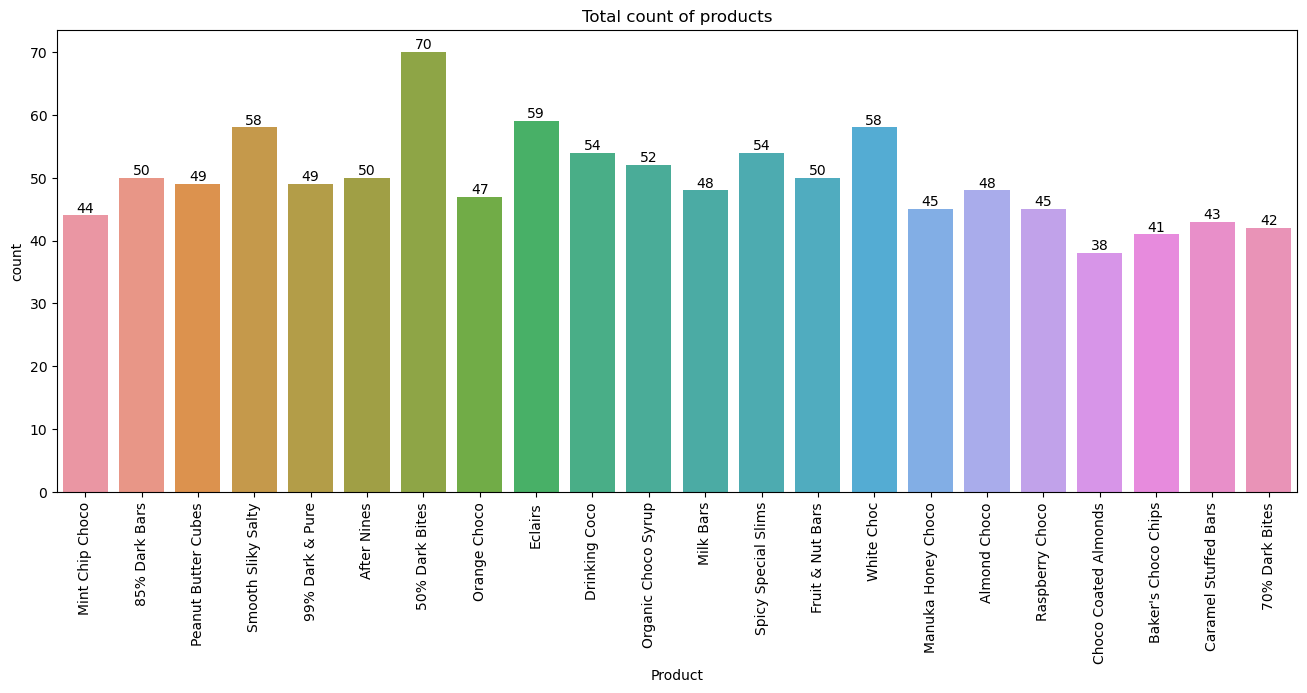

In [36]:
plt.figure(figsize=(16,6))
plt.title("Total count of products")
a=sns.countplot(data=ef,x='Product')
a.bar_label(a.containers[0])
plt.xticks(rotation=90)
plt.show()

50% Dark Bites are more selled and Choco coated Almonds are less in number

Q. Count the total number of chocolates by Country

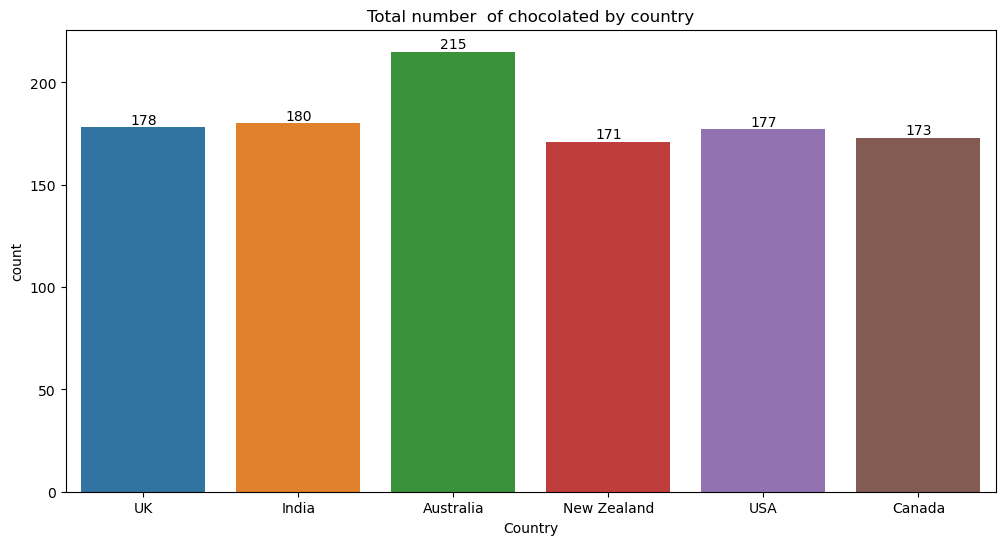

In [37]:
plt.figure(figsize=(12,6))
plt.title("Total number  of chocolated by country")
a=sns.countplot(data=ef,x='Country')
a.bar_label(a.containers[0])
plt.show()

Australia have more number of chocolates than other countries and canada, new zealand are less

Q. plot a graph on amount based on countries

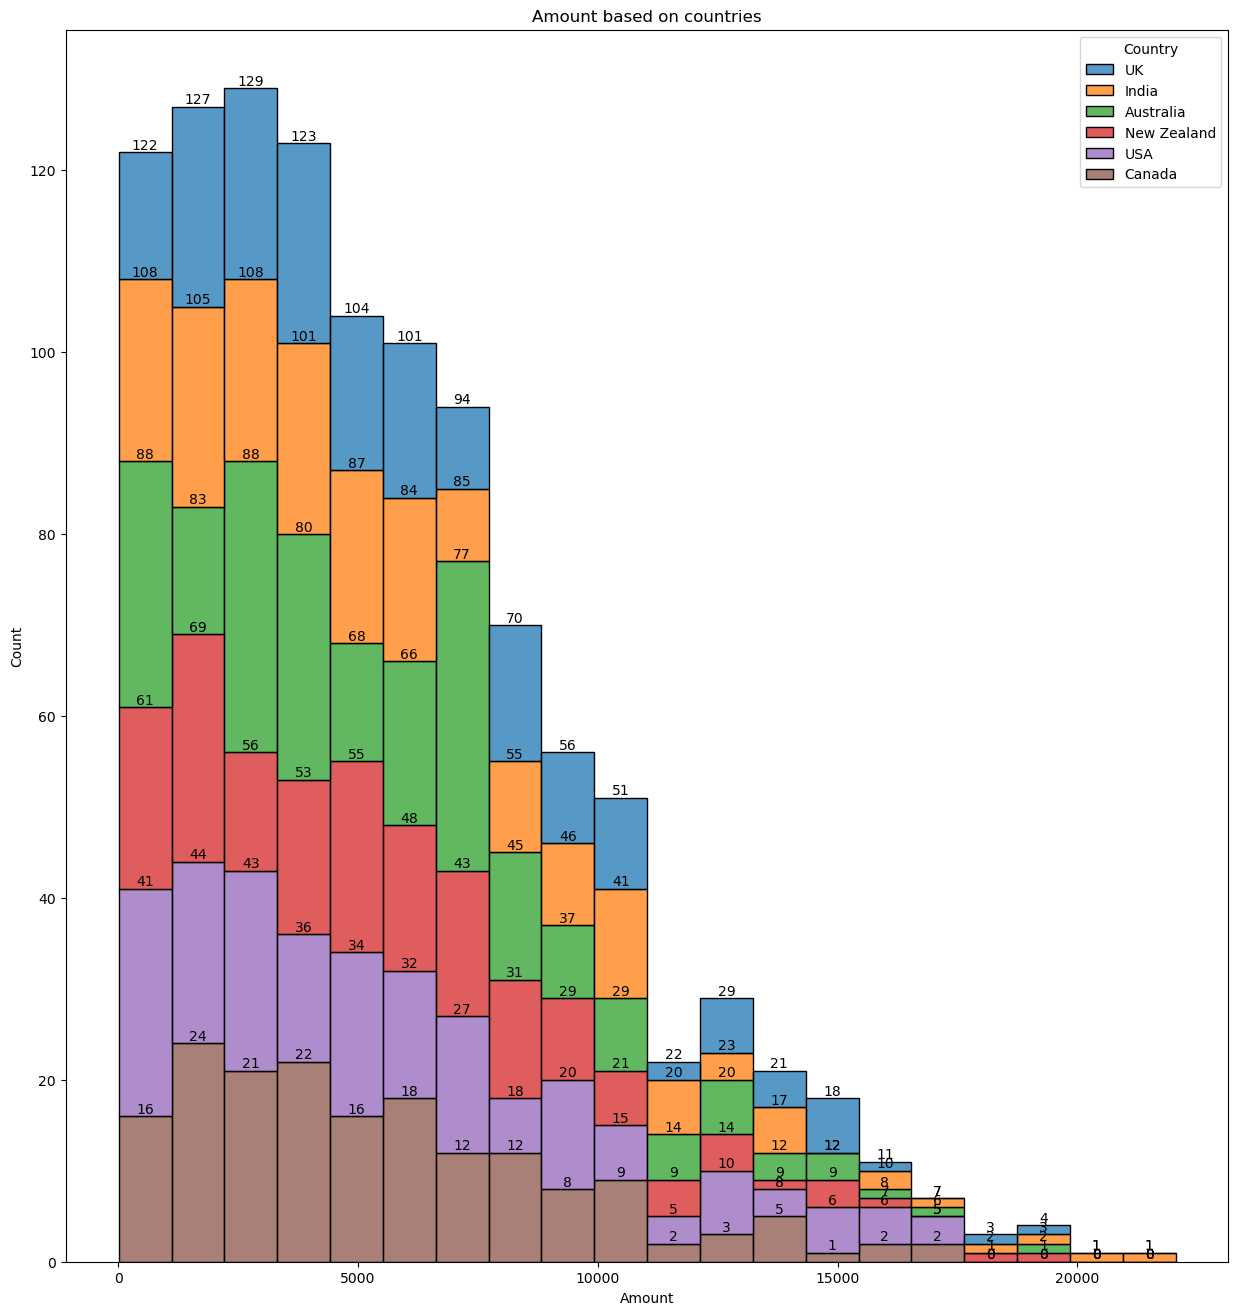

In [38]:
plt.figure(figsize=(15,16))
plt.title("Amount based on countries")
a=sns.histplot(data=ef,x='Amount',hue='Country',multiple='stack',bins=(20))
for i in a.containers:
    a.bar_label(i)
plt.show()

The price of chocolate from 0 to 10000 all country chocolates count is good, later amount increases the count of chocolate is decreases lot

Q. plot a distribution of boxes shipped

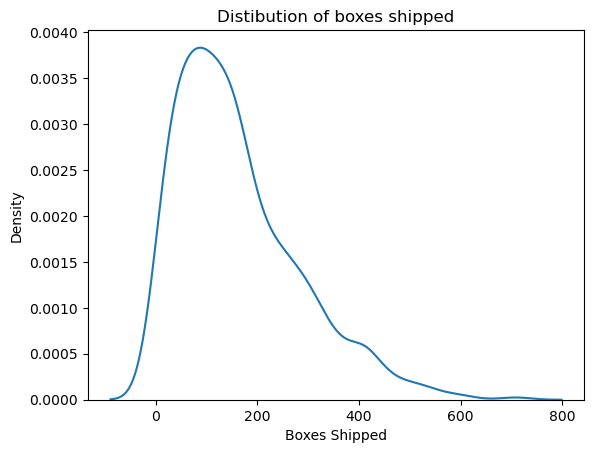

In [39]:
plt.title("Distibution of boxes shipped")
a=sns.kdeplot(data=ef,x='Boxes Shipped')

The boxes- shipped from o to 500 is more , and more than 500 , the boxes-shipped is less

Q. Percenatage of chocolates in countries

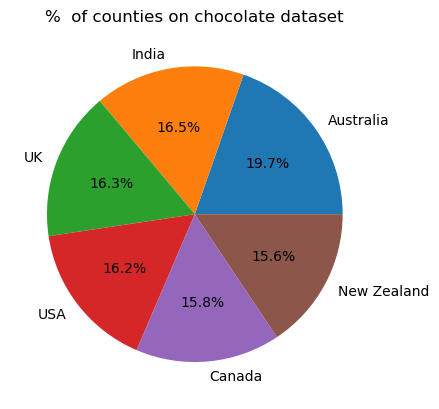

In [40]:
per_countries=ef['Country'].value_counts()
plt.title("%  of counties on chocolate dataset")
plt.pie(x=per_countries.values,labels=per_countries.index,autopct='%1.1f%%')
plt.show()

Australia-->India-->UK-->USA-->Canada-->New Zealand are ordered

Q.PLot the relationship between amount and boxes shipped

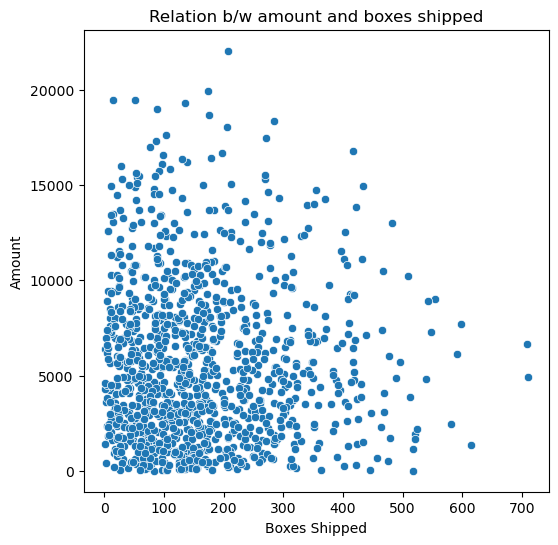

In [41]:
plt.figure(figsize=(6,6))
plt.title("Relation b/w amount and boxes shipped")
sns.scatterplot(data=ef,y='Amount',x='Boxes Shipped')
plt.show()

The amount and Boxes shipped more scatted in range of 500 boxes to 150000 amount, later outliers are visible in scatter lot

Q. plot a realation b/w country and boxes shippped

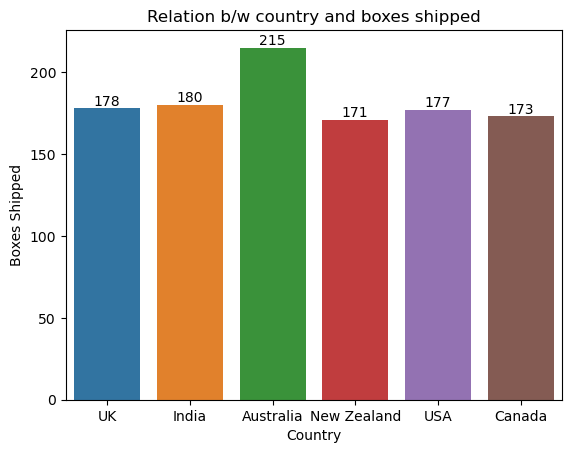

In [42]:
plt.title("Relation b/w country and boxes shipped")
a=sns.barplot(data=ef,x='Country',y='Boxes Shipped',errorbar=None,estimator='count')
for i in a.containers:
    a.bar_label(i)

The more boxes shipped by Auatralia, and less by New Zealand 

Q. Is there any outliers in amount

<Axes: xlabel='Amount'>

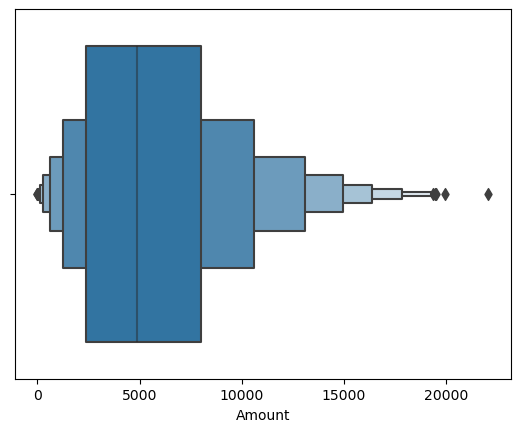

In [43]:
sns.boxenplot(data=ef,x='Amount')

The price of chocoaltes more than 

Q. Is there any outliers in boxes shipped

<Axes: xlabel='Boxes Shipped'>

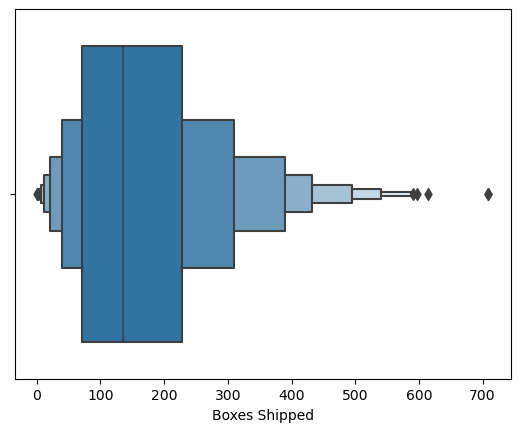

In [44]:
sns.boxenplot(data=ef,x='Boxes Shipped')

outliers are present more than 500 boxes shipped

Q. Graph a plot which type of chocolate sold more in each country

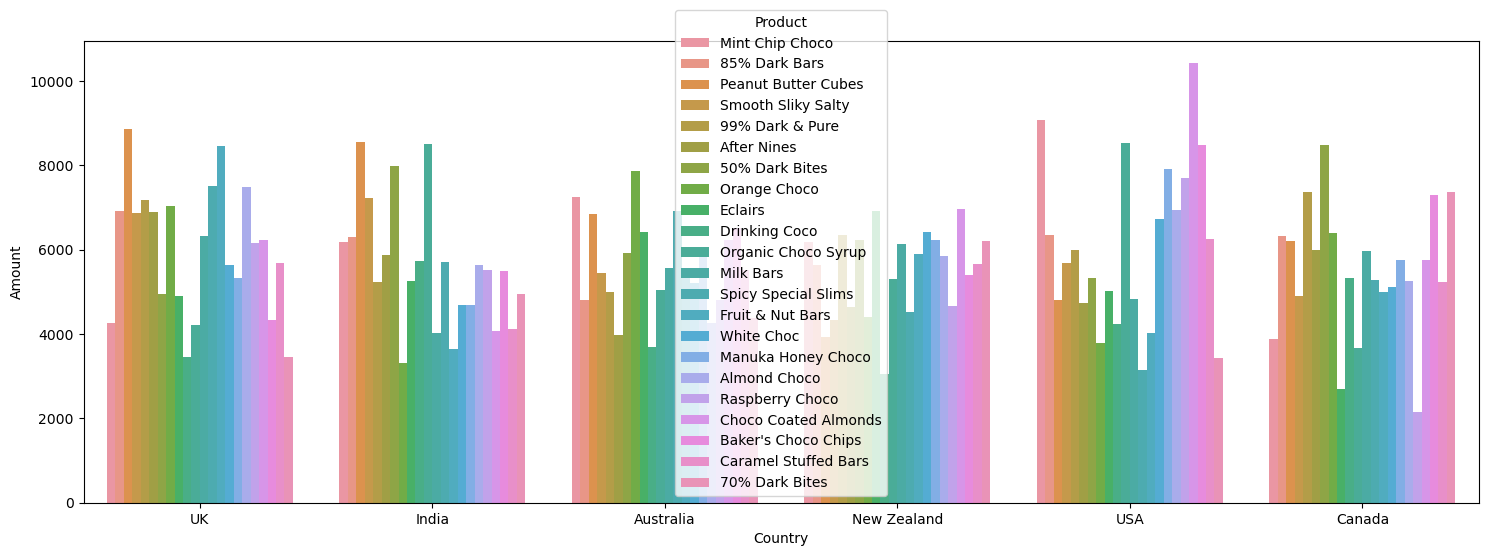

In [45]:
plt.figure(figsize=(18,6))
sns.barplot(data=ef,x='Country',y='Amount',hue='Product',errorbar=None)
plt.show()

Q. Pairplot of chocolates colored by country

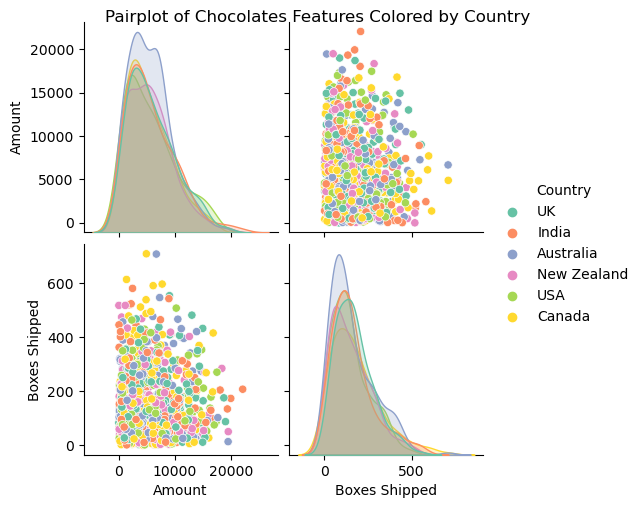

In [46]:

ef_pair = ef[['Amount','Boxes Shipped','Country']]
sns.pairplot(data=ef_pair, hue='Country', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Chocolates Features Colored by Country', y=1.00)
plt.show()

Country Australia having highest amount  and new zealand having less amount.

Boxes-shipped, Austalia and india

In [47]:
cons=(ef['Country']=='Canada')
ef.loc[cons,['Sales Person']].count()

Sales Person    173
dtype: int64

In [48]:
ef.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


india--180
Australia--250

CONCLUSION---
------------------

The maximum amount and boxes shipped by australia, where india's cost of chocolates is more than australia

The more boxes shipped b/w range of 250 to 500 and less in more than 500 range

The amount of chocolates are b/w 5000 to 15000 are more chocolates, and later increases the amount , the count of chocaltes are decreses

The Australia having more sales person than remaing all, hence autsralia having good returns and sales then remaing all, where New zealand having less sales person then all countries, and boxes shipped also less